In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import matplotlib.cm as cm




class DBSCAN:
    def __init__(self,filename,epsilon,min_points):
        self.filename = filename
        self.epsilon = epsilon
        self.min_points = min_points
    
    def density(self):
        with open(self.filename) as textFile:
            lines=[line.split() for line in textFile]

        data=np.asarray(lines)
        points= np.matrix(data[:,2:],dtype=float,copy=False)
        ground_truth = data[:,1]
        dist_matrix=distance_matrix(points,points)
        cluster_final =np.zeros(len(points),dtype=int)
        visited_points=np.zeros(len(points),dtype=bool)
        return data,points,ground_truth,dist_matrix,cluster_final,visited_points




    def regionQuery(self,query_point_index,points,dist_matrix):
        neighbour_list = []

        for i in range(len(points)):
            if dist_matrix[query_point_index][i] <= self.epsilon:
                neighbour_list.append(i)

        return neighbour_list


    def expandCluster(self,corepoint_index,points,neighbour_pts,cluster,cluster_final,visited_points,dist_matrix):
         i=0
         #print("com expand cluster")
         while i < len(neighbour_pts):
             #print(i)

            if(not visited_points[neighbour_pts[i]]):
                visited_points[neighbour_pts[i]]=True
                new_neighbours = self.regionQuery(neighbour_pts[i],points,dist_matrix)
                if(len(new_neighbours) >= self.min_points):
                    neighbour_pts=neighbour_pts+new_neighbours
                if(cluster_final[neighbour_pts[i]]==0):
                    cluster_final[neighbour_pts[i]]=cluster;
            i=i+1


    def dbscan(self,points,visited_points,cluster_final,dist_matrix):
        cluster=0

        for i in range(len(points)):

            if(not visited_points[i]):
                visited_points[i]=True
                neighbour_pts = self.regionQuery(i,points,dist_matrix)
                if(len(neighbour_pts)<self.min_points):
                    cluster_final[i]=0
                else:
                    cluster=cluster+1;
                    cluster_final[i]=cluster;
                    self.expandCluster(i,points, neighbour_pts,cluster,cluster_final,visited_points,dist_matrix)



                    
    def graphplot(self,points,cluster_final):
        pca_plot_matrix = PCA(n_components=2).fit_transform(points)
        plot_unique_labels = list(set(cluster_final))
        unique_naming_list_1=[]

        colours_unique_vector = cm.Set1(np.linspace(0, 1, len(plot_unique_labels)))

        for i in range(len(plot_unique_labels)):
            dis_rows_index = np.where(cluster_final==plot_unique_labels[i])
            dis_rows = pca_plot_matrix[dis_rows_index]
            x_plot =[dis_rows[:,0]]
            y_plot = [dis_rows[:,1]]
            unique_naming_list_1.append(plt.scatter(x_plot, y_plot, c=colours_unique_vector[i]))

                #plt.scatter(x_plot,y_plot,c=colours_unique_vector[i])
        plot_unique_labels=[-1.0 if x==0 else x for x in plot_unique_labels]
        plot_unique_labels=np.array(plot_unique_labels,dtype=int)

        plt.legend(unique_naming_list_1,plot_unique_labels,loc="best",ncol=1,markerfirst=True,shadow=True)
        plt.xlabel("PC 1")
        plt.ylabel("PC 2")
        plt.title("DBSCAN using PCA to visualize "+self.filename,fontweight="bold")
        plt.show()




    def calculateJacRand(self,data,points,ground_truth,cluster_final):
        true_pos = 0
        true_neg = 0
        false_pos=0
        false_neg=0
        for i in range(len(data)):
            for j in range(len(data)):
                if ground_truth[i]==ground_truth[j]:
                    if cluster_final[i]==cluster_final[j]:
                        true_pos=true_pos+1
                    else:
                        false_neg=false_neg+1
                elif ground_truth[i]!=ground_truth[j]:
                    if cluster_final[i]==cluster_final[j]:
                        false_pos=false_pos+1
                    else:
                        true_neg=true_neg+1
        jaccard_value=(true_pos)/(true_pos+false_pos+false_neg)
        rand_index_value=(true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
        return jaccard_value,rand_index_value

    









Enter the filename: cho.txt
Enter the eps value: 1.13
Enter the minimum points: 3


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

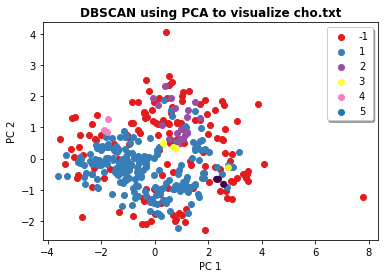

Jaccard Coefficient =  0.21188257110517064
Rand Index =  0.560726462455368


In [7]:
filename = input("Enter the filename: ")
epsilon = float(input("Enter the eps value: "))
min_points=int(input("Enter the minimum points: "))

dbs = DBSCAN(filename,epsilon,min_points)

data,points,ground_truth,dist_matrix,cluster_final,visited_points=dbs.density()

dbs.dbscan(points,visited_points,cluster_final,dist_matrix)
dbs.graphplot(points,cluster_final)
jaccard_value,rand_index_value=dbs.calculateJacRand(data,points,ground_truth,cluster_final)

print("Jaccard Coefficient = ",jaccard_value)
print("Rand Index = ",rand_index_value)